In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

1.8189923447209395 79.60212867358177
29.76742547377036 56.98657664854866
-27.941915312448806 42.48265629382411
83.55368329304454 149.5877184359444
-74.7348737118934 -148.91169296130542
66.00616282174857 20.798131417318814
-81.39401981435356 2.5687470385618383
51.880926268414356 116.2800176857508
-79.27232855454871 84.47135948333107
-46.053666077892224 -35.35850497419116
-38.157588618623656 40.38863461988069
32.209273922600616 -140.4938612974825
28.74167140766872 -164.0671381187421
36.04422792641098 149.4543212130837
31.53355050762289 -12.015022442963868
-23.727387976257546 -66.07623358493117
-30.09745948075315 -93.46638743336128
-51.01778689149925 91.61422145785576
-65.45940729733248 102.35244592983702
-64.89168060608944 66.12002624187352
67.498652816652 64.68562604510183
-77.95692515070715 133.77384374788426
11.51047932829043 70.5340912914316
65.81870748584907 123.56814461654335
3.6103312707041937 -173.66155376053158
70.08200203263655 128.35376033434721
-60.690819745408525 173.5651334

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [7]:
#Import our dependencies and initialize counters and an empty list that will hold the weather data.
#Loop through the cities list.
#Group the cities in sets of 50 to log the process as we find the weather data for each city.
#Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
#Build the city_url or endpoint for each city.
#Log the URL and the record and set numbers.
#Make an API request for each city.
#Parse the JSON weather data for the following:
#City, country, and date
#Latitude and longitude
#Maximum temperature
#Humidity
#Cloudiness
#Wind speed
#Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=08fd94904f975f4495ed5e1c93799a03


In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [21]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | weligama
Processing Record 2 of Set 13 | bardsir
Processing Record 3 of Set 13 | beloha
Processing Record 4 of Set 13 | chokurdakh
Processing Record 5 of Set 13 | mataura
Processing Record 6 of Set 13 | boden
Processing Record 7 of Set 13 | hermanus
Processing Record 8 of Set 13 | kholbon
Processing Record 9 of Set 13 | busselton
Processing Record 10 of Set 13 | cidreira
Processing Record 11 of Set 13 | margate
Processing Record 12 of Set 13 | fortuna
Processing Record 13 of Set 13 | kapaa
Processing Record 14 of Set 13 | kamaishi
Processing Record 15 of Set 13 | agadir
Processing Record 16 of Set 13 | jujuy
City not found. Skipping...
Processing Record 17 of Set 13 | lebu
Processing Record 18 of Set 13 | albany
Processing Record 19 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 20 of Set 13 | sovetskiy
Processing Record 21 of Set 13 | new norfolk
Processing Record 22 of Set

Processing Record 34 of Set 16 | east london
Processing Record 35 of Set 16 | porto velho
Processing Record 36 of Set 16 | muros
Processing Record 37 of Set 16 | chumikan
Processing Record 38 of Set 16 | ushtobe
Processing Record 39 of Set 16 | adrar
Processing Record 40 of Set 16 | snasa
Processing Record 41 of Set 16 | yulara
Processing Record 42 of Set 16 | oreanda
City not found. Skipping...
Processing Record 43 of Set 16 | hilo
Processing Record 44 of Set 16 | mehran
Processing Record 45 of Set 16 | hervey bay
Processing Record 46 of Set 16 | slave lake
Processing Record 47 of Set 16 | sao joao da barra
Processing Record 48 of Set 16 | cerrito
Processing Record 49 of Set 16 | maceio
Processing Record 50 of Set 16 | moses lake
Processing Record 1 of Set 17 | victoria
Processing Record 2 of Set 17 | mirnyy
Processing Record 3 of Set 17 | el faiyum
City not found. Skipping...
Processing Record 4 of Set 17 | bambous virieux
Processing Record 5 of Set 17 | muhos
Processing Record 6 of 

Processing Record 20 of Set 20 | san vicente
Processing Record 21 of Set 20 | northam
Processing Record 22 of Set 20 | saskylakh
Processing Record 23 of Set 20 | kahului
Processing Record 24 of Set 20 | kattivakkam
Processing Record 25 of Set 20 | grand gaube
Processing Record 26 of Set 20 | port-cartier
Processing Record 27 of Set 20 | batemans bay
Processing Record 28 of Set 20 | inirida
Processing Record 29 of Set 20 | porto belo
Processing Record 30 of Set 20 | iquique
Processing Record 31 of Set 20 | chuy
Processing Record 32 of Set 20 | hongan
City not found. Skipping...
Processing Record 33 of Set 20 | havelock
Processing Record 34 of Set 20 | magalia
Processing Record 35 of Set 20 | bloomfield
Processing Record 36 of Set 20 | simbahan
Processing Record 37 of Set 20 | borovichi
Processing Record 38 of Set 20 | ayan
Processing Record 39 of Set 20 | mocuba
Processing Record 40 of Set 20 | bergen
Processing Record 41 of Set 20 | aswan
Processing Record 42 of Set 20 | san policarpo


Processing Record 9 of Set 24 | bilma
Processing Record 10 of Set 24 | kalamata
Processing Record 11 of Set 24 | codrington
Processing Record 12 of Set 24 | alice springs
Processing Record 13 of Set 24 | igunga
Processing Record 14 of Set 24 | ormara
Processing Record 15 of Set 24 | marsh harbour
Processing Record 16 of Set 24 | bogalusa
Processing Record 17 of Set 24 | santa cruz do sul
Processing Record 18 of Set 24 | tucupita
Processing Record 19 of Set 24 | chissamba
Processing Record 20 of Set 24 | miraflores
Processing Record 21 of Set 24 | saint-felicien
Processing Record 22 of Set 24 | kastamonu
Processing Record 23 of Set 24 | cruzeiro do sul
Processing Record 24 of Set 24 | vila velha
Processing Record 25 of Set 24 | fairview
Processing Record 26 of Set 24 | bandiagara
Processing Record 27 of Set 24 | bakel
Processing Record 28 of Set 24 | ketchenery
City not found. Skipping...
Processing Record 29 of Set 24 | hazleton
Processing Record 30 of Set 24 | ucluelet
Processing Reco

In [23]:
len(city_data)

571

In [24]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Weligama,5.9667,80.4167,77.50,90,100,10.54,LK,2022-06-05 19:01:19
1,Bardsir,29.9227,56.5743,67.64,18,0,3.67,IR,2022-06-05 19:01:19
2,Beloha,-25.1667,45.0500,67.39,85,99,5.08,MG,2022-06-05 19:01:20
3,Chokurdakh,70.6333,147.9167,45.70,48,76,9.66,RU,2022-06-05 19:01:20
4,Mataura,-46.1927,168.8643,39.47,96,0,3.49,NZ,2022-06-05 19:01:20
5,Boden,65.8252,21.6886,55.40,46,15,11.56,SE,2022-06-05 19:01:21
6,Hermanus,-34.4187,19.2345,59.81,67,29,8.32,ZA,2022-06-05 19:01:21
7,Kholbon,51.8833,116.2500,52.83,53,37,1.19,RU,2022-06-05 19:01:21
8,Busselton,-33.6500,115.3333,55.31,75,100,8.77,AU,2022-06-05 19:01:22
9,Cidreira,-30.1811,-50.2056,62.31,95,100,4.14,BR,2022-06-05 19:00:12


In [26]:
#reordering the columns 
city_data_reordered = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[city_data_reordered]

city_data_df.head(20)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Weligama,LK,2022-06-05 19:01:19,5.9667,80.4167,77.50,90,100,10.54
1,Bardsir,IR,2022-06-05 19:01:19,29.9227,56.5743,67.64,18,0,3.67
2,Beloha,MG,2022-06-05 19:01:20,-25.1667,45.0500,67.39,85,99,5.08
3,Chokurdakh,RU,2022-06-05 19:01:20,70.6333,147.9167,45.70,48,76,9.66
4,Mataura,NZ,2022-06-05 19:01:20,-46.1927,168.8643,39.47,96,0,3.49
5,Boden,SE,2022-06-05 19:01:21,65.8252,21.6886,55.40,46,15,11.56
6,Hermanus,ZA,2022-06-05 19:01:21,-34.4187,19.2345,59.81,67,29,8.32
7,Kholbon,RU,2022-06-05 19:01:21,51.8833,116.2500,52.83,53,37,1.19
8,Busselton,AU,2022-06-05 19:01:22,-33.6500,115.3333,55.31,75,100,8.77
9,Cidreira,BR,2022-06-05 19:00:12,-30.1811,-50.2056,62.31,95,100,4.14


In [27]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [28]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

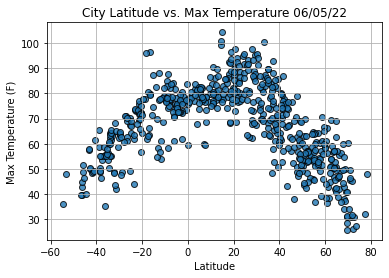

In [29]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

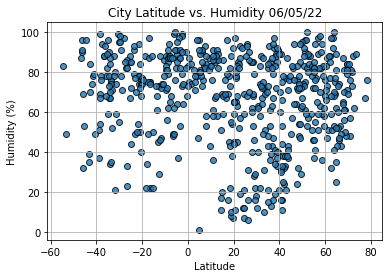

In [30]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

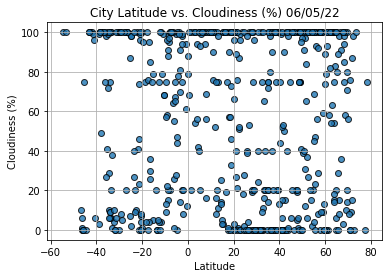

In [31]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

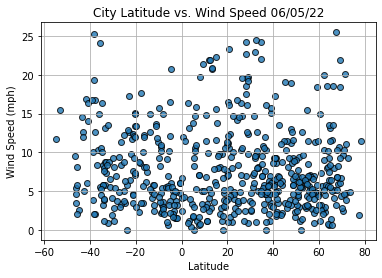

In [32]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [37]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [38]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Weligama,LK,2022-06-05 19:01:19,5.9667,80.4167,77.50,90,100,10.54
1,Bardsir,IR,2022-06-05 19:01:19,29.9227,56.5743,67.64,18,0,3.67
3,Chokurdakh,RU,2022-06-05 19:01:20,70.6333,147.9167,45.70,48,76,9.66
5,Boden,SE,2022-06-05 19:01:21,65.8252,21.6886,55.40,46,15,11.56
7,Kholbon,RU,2022-06-05 19:01:21,51.8833,116.2500,52.83,53,37,1.19
...,...,...,...,...,...,...,...,...,...
565,Verkhnyaya Inta,RU,2022-06-05 19:16:33,65.9811,60.3094,47.35,47,8,13.47
566,Awjilah,LY,2022-06-05 19:16:33,29.1081,21.2869,84.96,29,0,19.15
567,Saidpur,BD,2022-06-05 19:16:34,25.7777,88.8917,77.22,93,39,7.05
568,Tourlaville,FR,2022-06-05 19:16:34,49.6383,-1.5664,60.22,67,0,6.91


In [39]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Weligama,LK,2022-06-05 19:01:19,5.9667,80.4167,77.50,90,100,10.54
1,Bardsir,IR,2022-06-05 19:01:19,29.9227,56.5743,67.64,18,0,3.67
3,Chokurdakh,RU,2022-06-05 19:01:20,70.6333,147.9167,45.70,48,76,9.66
5,Boden,SE,2022-06-05 19:01:21,65.8252,21.6886,55.40,46,15,11.56
7,Kholbon,RU,2022-06-05 19:01:21,51.8833,116.2500,52.83,53,37,1.19


In [40]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

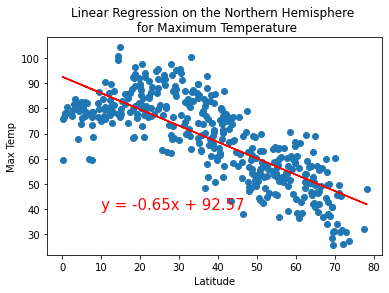

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

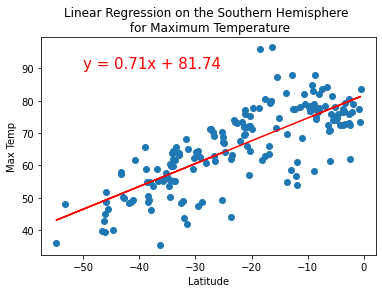

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

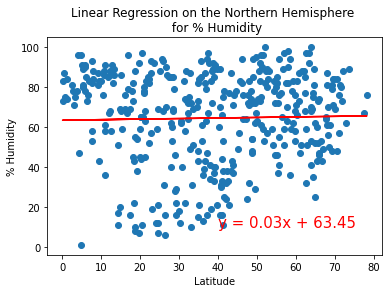

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

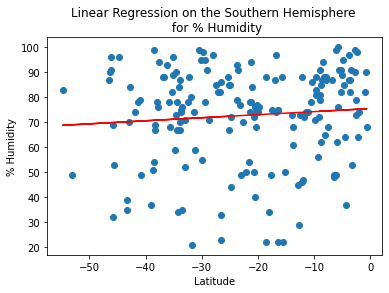

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

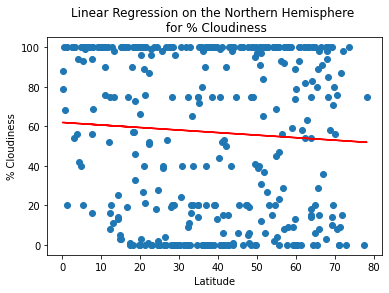

In [50]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

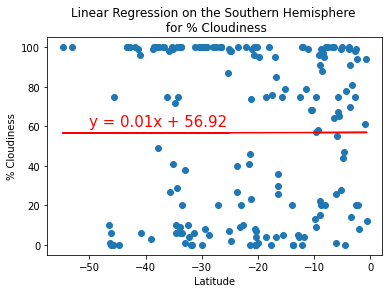

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

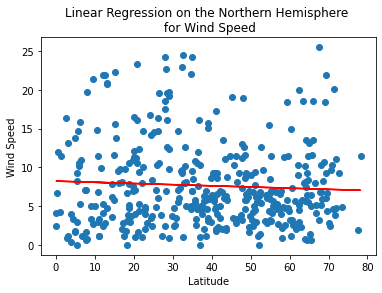

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

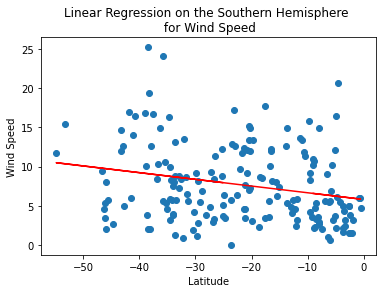

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))